In [1]:
! chmod 600 kaggle.json
! KAGGLE_CONFIG_DIR=/content/  kaggle datasets download -d hchen13/marvel-heroes

 99% 1.12G/1.13G [00:09<00:00, 129MB/s]
100% 1.13G/1.13G [00:09<00:00, 131MB/s]


**Mempersiapakan Direktori**

In [2]:
import zipfile 
import os

In [38]:
dataZip = zipfile.ZipFile('/content/marvel-heroes.zip')
dataZip.extractall('/content/')

In [49]:
base_dir = '/content/marvel/train'
hero_class = os.listdir(base_dir)
hero_class

['black widow',
 'hulk',
 'ironman',
 'captain america',
 'thanos',
 'loki',
 'doctor strange',
 'spider-man']

**Image Preprocessing**

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    width_shift_range = .2,
    height_shift_range = .2,
    validation_split = 0.2
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100,150),
    classes = hero_class,
    class_mode = 'categorical',
    subset = 'training',
    batch_size = 4,
    shuffle = False
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100,150),
    classes = hero_class,
    class_mode = 'categorical',
    subset = 'validation',
    batch_size = 3,
    shuffle = True
)

Found 2070 images belonging to 8 classes.
Found 514 images belonging to 8 classes.


In [8]:
print(train_generator[0])

(array([[[[0.04313726, 0.06666667, 0.0509804 ],
         [0.04313726, 0.06666667, 0.0509804 ],
         [0.04313726, 0.06666667, 0.0509804 ],
         ...,
         [0.0667567 , 0.09028611, 0.08244298],
         [0.07450981, 0.09803922, 0.09019608],
         [0.0693274 , 0.09285681, 0.08501367]],

        [[0.03931589, 0.06284531, 0.04715903],
         [0.04229612, 0.06582554, 0.05013926],
         [0.04313726, 0.06666667, 0.0509804 ],
         ...,
         [0.07076763, 0.09429705, 0.08645391],
         [0.07450981, 0.09803922, 0.09019608],
         [0.0663192 , 0.08984861, 0.08200547]],

        [[0.0336594 , 0.05718881, 0.04378938],
         [0.03167258, 0.05520199, 0.03981574],
         [0.03390275, 0.05743216, 0.04174588],
         ...,
         [0.07450981, 0.09803922, 0.09019608],
         [0.07450981, 0.09803922, 0.09019608],
         [0.063311  , 0.08684041, 0.07899727]],

        ...,

        [[0.7685638 , 0.71626633, 0.6370565 ],
         [0.75445116, 0.7566586 , 0.6863214 

**Modelling**

**Tingkat Akurasi**


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(8, activation = 'softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 148, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 17, 32)       0

In [10]:
model.compile(
    loss= 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 10,
    validation_steps = 5,
    validation_data = validation_generator,
    verbose = 1,
    batch_size=8,
)


Epoch 1/10
20/20 [==============================] - 5s 220ms/step - loss: 2.2103 - accuracy: 0.0875 - val_loss: 2.0840 - val_accuracy: 0.1333
Epoch 2/10
20/20 [==============================] - 4s 197ms/step - loss: 2.0851 - accuracy: 0.0875 - val_loss: 2.0759 - val_accuracy: 0.2000
Epoch 3/10
20/20 [==============================] - 4s 204ms/step - loss: 2.0805 - accuracy: 0.1250 - val_loss: 2.0776 - val_accuracy: 0.1333
Epoch 4/10
20/20 [==============================] - 4s 191ms/step - loss: 2.0863 - accuracy: 0.1375 - val_loss: 2.0834 - val_accuracy: 0.1333
Epoch 5/10
20/20 [==============================] - 4s 185ms/step - loss: 2.0811 - accuracy: 0.0500 - val_loss: 2.0716 - val_accuracy: 0.1333
Epoch 6/10
20/20 [==============================] - 4s 221ms/step - loss: 2.0850 - accuracy: 0.1125 - val_loss: 2.0886 - val_accuracy: 0.0667
Epoch 7/10
20/20 [==============================] - 4s 203ms/step - loss: 2.0730 - accuracy: 0.2625 - val_loss: 2.0823 - val_accuracy: 0.0667
Epoch 

<function matplotlib.pyplot.show(*args, **kw)>

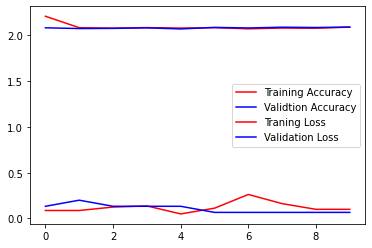

In [12]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))

plt.plot(epochs, train_accuracy, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validtion Accuracy')
plt.legend(loc = 'best')
plt.show

plt.plot(epochs, loss, 'r', label = 'Traning Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'best')
plt.show



**Upload Image**

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving pic_001.jpg to pic_001 (20).jpg
1/1 [==============================] - 0s 23ms/step


8

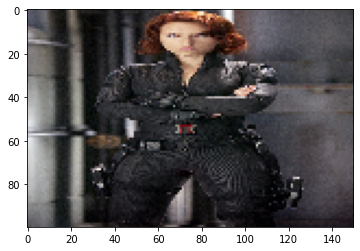

In [42]:
# upload images
uploaded = files.upload()

# loop through uploaded images
for fn in uploaded.keys():
  # load and preprocess image
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  # stack images
  images = np.vstack([x])
  
  # predict classes
  classes = model.predict(images, batch_size=10)

  # loop through class labels and print predicted class
  for i in range(len(hero_class)) :
    hero_class[i-1]
    if classes[0][i] == 1. :
      print("Image predicted as ", hero_class[i-1])
      # hero_class[i-1]
      break

len(hero_class)

In [44]:
# Library for plotting the images and the loss function
import matplotlib.pyplot as plt

# We import the data set from tensorflow and build the model there
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [45]:
train_labels[1]

array([9], dtype=uint8)

IndexError: ignored

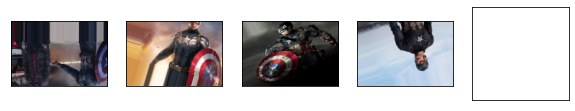

In [51]:
# Define the 10 image classes
hero_class = ['black window', 'captain america', 'doctor strange', 'hulk', 'ironman',
               'loki', 'spider-man', 'thanos']

# Show the first 10 images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Die CIFAR Labels sind Arrays, deshalb benötigen wir den extra Index
#     plt.xlabel(class_names[train_labels[i][0]])
# plt.show()